In [1]:
import pandas as pd

In [2]:
data = {
    "1 ensemble": {'md_counts':1,
                   'node_counts': 64,
                  'durations': {"unit.000000":828,
"unit.000001":699,
"unit.000002":36,
"unit.000003":695,
}},
    "4 ensembles": {'md_counts':4,
                    'node_counts': 256,
                    'durations': {
                        "unit.000000":828,
                        "unit.000001":832,
                        "unit.000002":829,
                        "unit.000003":836,
                        "unit.000004":1288,
                        "unit.000005":48,
                        "unit.000006":730,
                    }},
    "8 ensembles": {"md_counts":8,
                    'node_counts': 512,
                   'durations':{"unit.000000":828,
"unit.000001":828,
"unit.000002":833,
"unit.000003":827,
"unit.000004":829,
"unit.000005":830,
"unit.000006":830,
"unit.000007":837,
"unit.000008":3460,
"unit.000009":49,
"unit.000010":6,
}},
"16 ensembles": {"md_counts": 16,
                 'node_counts': 1024,
                'durations': {"unit.000000":829,
"unit.000001":828,
"unit.000002":826,
"unit.000003":827,
"unit.000004":1661,
"unit.000005":1655,
"unit.000006":1653,
"unit.000007":1654,
"unit.000008":1654,
"unit.000009":1653,
"unit.000010":1651,
"unit.000011":1649,
"unit.000012":1654,
"unit.000013":1650,
"unit.000014":1656,
"unit.000015":1651,
"unit.000016":3466,
"unit.000017":78,
"unit.000018":9,
}}}

In [3]:
mdruns = []
aggregations = []
aaes = []
outliers = []
for k, v in data.items():
    md_cnt = v['md_counts']
    avg = []
    aggregation = aae = outlier = 0 
    for k2, v2 in v['durations'].items():
        if md_cnt > 0:
            avg.append(v2)
        elif md_cnt == 0:
            aggregation = v2
        elif md_cnt == -1:   
            aae = v2
        else:
            outlier = v2
        md_cnt -= 1
    mdruns.append(sum(avg)//len(avg))
    aggregations.append(aggregation)
    aaes.append(aae)
    outliers.append(outlier)

In [4]:
df = pd.DataFrame({"NAMD":mdruns, 
                  "Preprocessing":aggregations,
                  "Training": aaes,
                  "Outlier": outliers},
                 index = data.keys())

,NAMD,Preprocessing,Training,Outlier
1 ensemble,828,699,36,695
4 ensembles,831,1288,48,730
8 ensembles,830,3460,49,6
16 ensembles,1446,3466,78,9


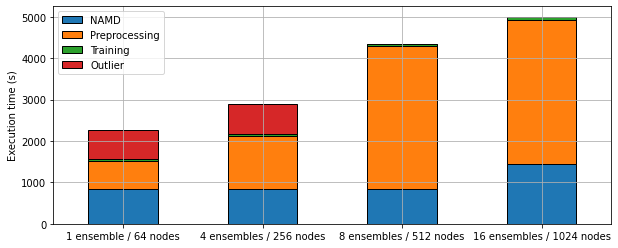

In [5]:
ax=df.plot.bar(stacked=True, rot=0, figsize=(10,4), edgecolor='black', grid=True)
ax.set_ylabel('Execution time (s)')
ax.set_xticklabels(['1 ensemble / 64 nodes', '4 ensembles / 256 nodes', '8 ensembles / 512 nodes', '16 ensembles / 1024 nodes'])
df

* Data represents 1st iteration
* 8 and 16 ensembles do not have outlier data
* NAMD runs on 16 ensembles show 1.7x overhead
* Preprocessing can be efficient with a better implementation taking new data only for the concatenation with existing data set

### Preprocessing Time in Parallel

In [6]:
preprocessing_4ensembles = [ 1248.3005650043488,
1246.0170612335205,
1275.4201829433441,
1278.1592063903809]
preprocessing_8ensembles= [1202.1181828975677,
1204.7154791355133,
3454.3189191818237,
3454.581567764282,
1315.4671506881714,
1315.7592742443085,
1282.5209002494812,
1279.5357327461243]
preprocessing_16ensembles=[ 1321.0102062225342,
 1319.6943583488464,
 1552.964349269867,
 1548.435376882553,
 1196.9855105876923,
 1198.4233350753784,
 3458.2162988185883,
 3455.300450563431,
 1246.005585193634,
 1249.3876893520355,
 3458.9150326251984,
 3457.4150643348694,
 1244.527244567871,
 1244.0490372180939,
 1245.956505537033,
 1245.7463912963867,
]
df_p4 = pd.DataFrame(preprocessing_4ensembles, index=list(range(1, len(preprocessing_4ensembles) + 1)))
df_p8 = pd.DataFrame(preprocessing_8ensembles, index=list(range(1, len(preprocessing_8ensembles) + 1)))
df_p16 = pd.DataFrame(preprocessing_16ensembles, index=list(range(1, len(preprocessing_16ensembles) + 1)))

Text(0.09, 0.5, 'MPI Rank (index)')

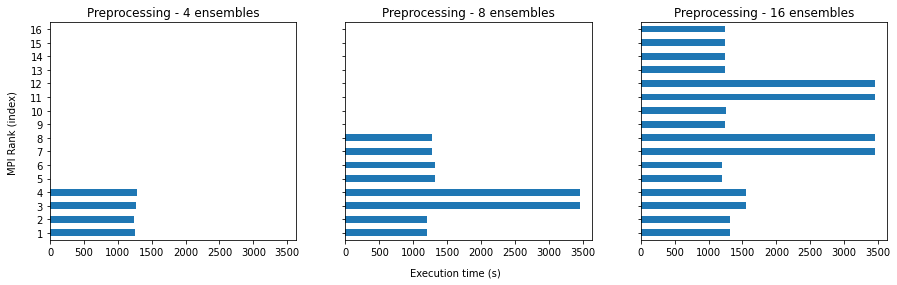

In [7]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True,  figsize=(15, 4))
df_p4.plot.barh(ax=axes[0],legend=False)
df_p8.plot.barh(ax=axes[1], legend=False)
df_p16.plot.barh(ax=axes[2], legend=False)
axes[0].title.set_text('Preprocessing - 4 ensembles')
axes[1].title.set_text('Preprocessing - 8 ensembles')
axes[2].title.set_text('Preprocessing - 16 ensembles')

fig.text(0.5, 0.01, 'Execution time (s)', ha='center', va='center')
fig.text(0.09, 0.5, 'MPI Rank (index)', ha='center', va='center', rotation='vertical')